In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Get tweets from each news organization's twitter feeds.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")


#Loop though target users.

for user in target_users:
    

    counter = 0
    
    public_tweets = api.user_timeline(user, count = 100)

    for tweet in public_tweets:

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})

        counter = counter + 1

In [3]:
#Create DataFrame.

news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,-0.6369,Sat Apr 28 20:01:07 +0000 2018,0.250,0.652,0.098,A crisis of plastic waste in Indonesia has bec...,0,@BBC
1,0.7650,Sat Apr 28 19:06:03 +0000 2018,0.000,0.680,0.320,❤️ This make-up artist is using her skills to ...,1,@BBC
2,0.0000,Sat Apr 28 18:01:06 +0000 2018,0.000,1.000,0.000,The UK's obesity rates have more than trebled ...,2,@BBC
3,0.5994,Sat Apr 28 17:02:00 +0000 2018,0.000,0.786,0.214,🤖📸 @TWBBC have created a chatbot that can pred...,3,@BBC
4,0.0000,Sat Apr 28 16:29:48 +0000 2018,0.000,1.000,0.000,RT @BBCOne: It turns out Tamsin Greig has had ...,4,@BBC
5,0.0000,Sat Apr 28 16:03:03 +0000 2018,0.000,1.000,0.000,⚖ BMI and obesity: Where are you on the UK fat...,5,@BBC
6,-0.7906,Sat Apr 28 15:00:23 +0000 2018,0.389,0.611,0.000,Palm oil can destroy the habitats of orangutan...,6,@BBC
7,0.0000,Sat Apr 28 14:10:02 +0000 2018,0.000,1.000,0.000,"🌈👀 Depending on what language you speak, your ...",7,@BBC
8,0.0000,Sat Apr 28 13:00:23 +0000 2018,0.000,1.000,0.000,⛷🦅 A test of speed and agility.\n#SuperFastFal...,8,@BBC
9,0.3612,Sat Apr 28 12:00:21 +0000 2018,0.000,0.872,0.128,😕 People are getting surgery to look like thei...,9,@BBC


In [12]:
news_sentiments.to_csv("News_Mood_Homework.csv", index=False)

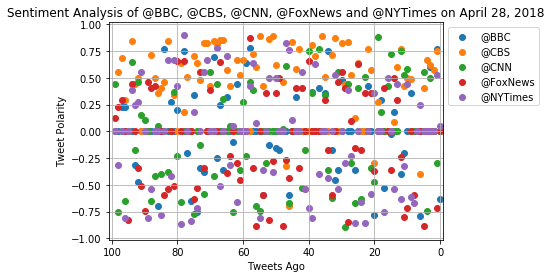

In [11]:
#Create the graph

plt.xlim(101, -1)

for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
plt.legend(bbox_to_anchor = (1,1))

plt.title("Sentiment Analysis of @BBC, @CBS, @CNN, @FoxNews and @NYTimes on April 28, 2018")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

plt.grid()
plt.savefig("Sentiment Analysis of Media Tweets")

plt.show()

In [6]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.006920
@CBS        0.390884
@CNN       -0.014500
@FoxNews   -0.052765
@NYTimes   -0.041047
Name: Compound, dtype: float64

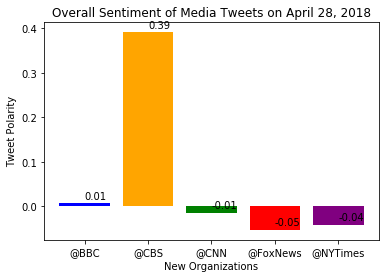

In [10]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index

count = 0

for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
    
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['blue', 'orange', 'green', 'red', 'purple'])
plt.title("Overall Sentiment of Media Tweets on April 28, 2018")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()